In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Bidirectional
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

In [35]:
df=pd.read_csv("kaggle_train.csv",parse_dates=['date'])

In [36]:
df.head()

,Unnamed: 0,date,store_nbr,sales,onpromotion,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,...,c_Cayambe,c_Cuenca,c_Ambato,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type
0,0,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
1,1,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
2,2,2013-01-01,25,2,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
3,3,2013-01-01,25,810,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
4,4,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3


In [37]:
df.drop(["onpromotion","Unnamed: 0"],1,inplace=True)

In [38]:
daily_sales=df.groupby(['date'])['sales'].mean()

In [6]:
sales=daily_sales.reset_index()['sales']

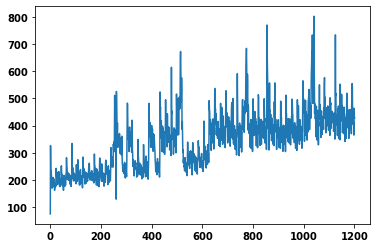

In [7]:
plt.plot(sales)

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
sales=scaler.fit_transform(np.array(sales).reshape(-1,1))

In [9]:
##splitting dataset into train and test split
training_size=int(len(sales)*0.8)
test_size=len(sales)-training_size
train_data,test_data=sales[0:training_size,:],sales[training_size:len(sales),:1]

In [10]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [11]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [12]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
X_train

array([[[0.        ],
        [0.34551773],
        [0.22330554],
        ...,
        [0.16843456],
        [0.18837728],
        [0.1988382 ]],

       [[0.34551773],
        [0.22330554],
        [0.21694193],
        ...,
        [0.18837728],
        [0.1988382 ],
        [0.16809516]],

       [[0.22330554],
        [0.21694193],
        [0.20030032],
        ...,
        [0.1988382 ],
        [0.16809516],
        [0.16330539]],

       ...,

       [[0.73222808],
        [0.6838845 ],
        [0.57042232],
        ...,
        [0.58058364],
        [0.5614575 ],
        [0.51053031]],

       [[0.6838845 ],
        [0.57042232],
        [0.43091946],
        ...,
        [0.5614575 ],
        [0.51053031],
        [0.49986146]],

       [[0.57042232],
        [0.43091946],
        [0.45045844],
        ...,
        [0.51053031],
        [0.49986146],
        [0.38302403]]])

In [14]:
X_test

array([[[0.38922883],
        [0.40628426],
        [0.36049171],
        ...,
        [0.34937721],
        [0.46409293],
        [0.44519137]],

       [[0.40628426],
        [0.36049171],
        [0.46168122],
        ...,
        [0.46409293],
        [0.44519137],
        [0.50830322]],

       [[0.36049171],
        [0.46168122],
        [0.45287512],
        ...,
        [0.44519137],
        [0.50830322],
        [0.65293211]],

       ...,

       [[0.4237    ],
        [0.51592687],
        [0.51292815],
        ...,
        [0.51183142],
        [0.45021   ],
        [0.46285737]],

       [[0.51592687],
        [0.51292815],
        [0.44898665],
        ...,
        [0.45021   ],
        [0.46285737],
        [0.3988681 ]],

       [[0.51292815],
        [0.44898665],
        [0.5448599 ],
        ...,
        [0.46285737],
        [0.3988681 ],
        [0.53417755]]])

In [15]:
y_train

array([0.16809516, 0.16330539, 0.15218078, 0.24912681, 0.18093719,
       0.16823376, 0.17000894, 0.16557811, 0.18860384, 0.27396948,
       0.22364888, 0.21661659, 0.17726067, 0.21295163, 0.20592557,
       0.14737413, 0.17964001, 0.14650431, 0.18566299, 0.22475859,
       0.18027883, 0.19244096, 0.15627221, 0.17923664, 0.19426077,
       0.16627378, 0.1633587 , 0.13197862, 0.18322235, 0.28766355,
       0.24253787, 0.22796065, 0.18572163, 0.20738444, 0.22693035,
       0.18319301, 0.18033982, 0.15093831, 0.17547861, 0.21181019,
       0.19975383, 0.18958294, 0.15577955, 0.17961268, 0.20636163,
       0.18226797, 0.17590617, 0.16575617, 0.18452655, 0.19609906,
       0.18435589, 0.2132395 , 0.2483876 , 0.24508158, 0.25680946,
       0.21259624, 0.2073027 , 0.17145004, 0.19504974, 0.20572921,
       0.17690617, 0.18337694, 0.17152912, 0.21901726, 0.21688047,
       0.19996389, 0.19346469, 0.16746878, 0.19006894, 0.20362708,
       0.17921266, 0.17888836, 0.15684173, 0.21052609, 0.30280

In [16]:
y_test

array([0.50830322, 0.65293211, 0.48518563, 0.55276878, 0.51495619,
       0.47773373, 0.51253657, 0.38709761, 0.48779829, 0.520982  ,
       0.40145146, 0.48273843, 0.40410351, 0.4930362 , 0.49324972,
       0.46070026, 0.47770852, 0.42742358, 0.53821796, 0.48209315,
       0.6431378 , 0.68975746, 0.55400577, 0.59056639, 0.51770042,
       0.49542273, 0.51052586, 0.41035072, 0.50486249, 0.48953008,
       0.44745262, 0.53776886, 0.44596508, 0.53515857, 0.54628678,
       0.48340499, 0.50015009, 0.4237    , 0.51592687, 0.51292815,
       0.44898665, 0.5448599 , 0.39752381, 0.58749834, 0.55319581,
       0.55351649, 0.56219671, 0.43332333, 0.49826782, 0.47770773,
       0.4792331 , 0.51896578, 0.47585303, 0.47888485, 0.50648633,
       0.46021886, 0.47482562, 0.41774288, 0.51053691, 0.47905575,
       0.45115266, 0.4992173 , 0.37839336, 0.51195669, 0.90562046,
       0.59678029, 0.60987386, 0.44934004, 0.49893195, 0.4954691 ,
       0.44867963, 0.48756904, 0.39674152, 0.48656761, 0.53160

In [17]:
def plot_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()
  plt.grid()

  plt.show()

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [20]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
27/27 [==============================] - 10s 46ms/step - loss: 0.0265 - val_loss: 0.0056
Epoch 2/10
27/27 [==============================] - 0s 17ms/step - loss: 0.0084 - val_loss: 0.0065
Epoch 3/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 4/10
27/27 [==============================] - 0s 17ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 5/10
27/27 [==============================] - 0s 17ms/step - loss: 0.0072 - val_loss: 0.0058
Epoch 6/10
27/27 [==============================] - 1s 20ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 7/10
27/27 [==============================] - 0s 15ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 8/10
27/27 [==============================] - 0s 18ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 9/10
27/27 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 10/10
27/27 [==============================] - 0s 17ms/step - loss: 0.0065 - val_loss: 0.0059


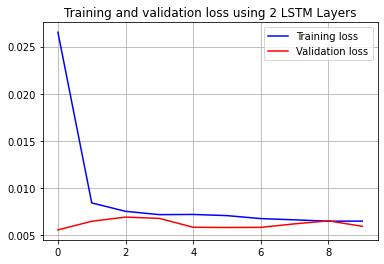

In [21]:
plot_history(history, 'Training and validation loss using 2 LSTM Layers')

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
performance=pd.DataFrame({"Layer":[],"Type":[],"RMSE Score":[]})

In [25]:
from math import sqrt

In [26]:
print("RMSE Score for training dataset: ",sqrt(mean_squared_error(y_train,train_predict)))

RMSE Score for training dataset:  345.08002443746324


In [27]:
rmse=sqrt(mean_squared_error(y_test,test_predict))

In [28]:
print("RMSE Score for testing dataset: ",rmse)

RMSE Score for testing dataset:  429.2058320938399


In [29]:
twolayerlstm={'Layer':2, 'RMSE Score': rmse, 'Type':"Uni-Directional"}
performance = performance.append(twolayerlstm, ignore_index = True)

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
14/14 [==============================] - 12s 150ms/step - loss: 0.0414 - val_loss: 0.0304
Epoch 2/10
14/14 [==============================] - 0s 24ms/step - loss: 0.0138 - val_loss: 0.0055
Epoch 3/10
14/14 [==============================] - 0s 19ms/step - loss: 0.0104 - val_loss: 0.0069
Epoch 4/10
14/14 [==============================] - 0s 26ms/step - loss: 0.0094 - val_loss: 0.0122
Epoch 5/10
14/14 [==============================] - 0s 25ms/step - loss: 0.0092 - val_loss: 0.0079
Epoch 6/10
14/14 [==============================] - 0s 26ms/step - loss: 0.0085 - val_loss: 0.0074
Epoch 7/10
14/14 [==============================] - 0s 21ms/step - loss: 0.0083 - val_loss: 0.0066
Epoch 8/10
14/14 [==============================] - 0s 23ms/step - loss: 0.0081 - val_loss: 0.0062
Epoch 9/10
14/14 [==============================] - 0s 25ms/step - loss: 0.0080 - val_loss: 0.0060
Epoch 10/10
14/14 [==============================] - 0s 21ms/step - loss: 0.0081 - val_loss: 0.0058


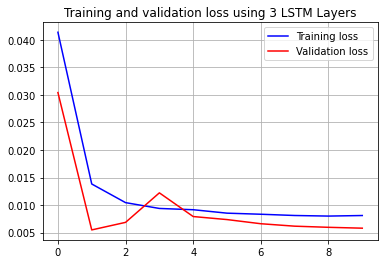

In [33]:
plot_history(history, 'Training and validation loss using 3 LSTM Layers')

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [35]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
print("rmse for train dataset: ",sqrt(mean_squared_error(y_train,train_predict)))

rmse for train dataset:  349.4606858396663


In [37]:
rmse=sqrt(mean_squared_error(y_test,test_predict))
print("Root Mean Squared Error for test dataset: ",rmse)

Root Mean Squared Error for test dataset:  432.21452357593364


In [38]:
threelayerlstm={'Layer':3, 'RMSE Score': rmse, 'Type':"Uni-Directional"}
performance = performance.append(threelayerlstm, ignore_index = True)

In [39]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [41]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
14/14 [==============================] - 11s 186ms/step - loss: 0.0420 - val_loss: 0.0239
Epoch 2/10
14/14 [==============================] - 1s 38ms/step - loss: 0.0116 - val_loss: 0.0175
Epoch 3/10
14/14 [==============================] - 0s 34ms/step - loss: 0.0102 - val_loss: 0.0074
Epoch 4/10
14/14 [==============================] - 0s 27ms/step - loss: 0.0097 - val_loss: 0.0066
Epoch 5/10
14/14 [==============================] - 0s 31ms/step - loss: 0.0092 - val_loss: 0.0057
Epoch 6/10
14/14 [==============================] - 0s 29ms/step - loss: 0.0091 - val_loss: 0.0058
Epoch 7/10
14/14 [==============================] - 0s 28ms/step - loss: 0.0090 - val_loss: 0.0057
Epoch 8/10
14/14 [==============================] - 0s 32ms/step - loss: 0.0092 - val_loss: 0.0065
Epoch 9/10
14/14 [==============================] - 0s 23ms/step - loss: 0.0090 - val_loss: 0.0062
Epoch 10/10
14/14 [==============================] - 0s 32ms/step - loss: 0.0089 - val_loss: 0.0056


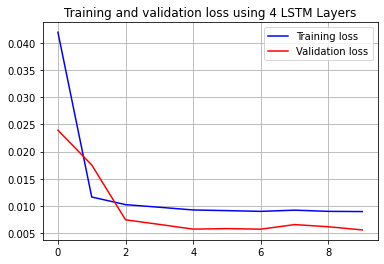

In [42]:
plot_history(history, 'Training and validation loss using 4 LSTM Layers')

In [43]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [44]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
print("rmse score for training dataset: ",sqrt(mean_squared_error(y_train,train_predict)))

rmse score for training dataset:  348.6500883038713


In [46]:
rmse=sqrt(mean_squared_error(y_test,test_predict))
print("Root Mean Squared Error for test dataset: ",rmse)

Root Mean Squared Error for test dataset:  428.2310476556102


In [47]:
fourlayerlstm={'Layer':4, 'RMSE Score': rmse, 'Type':"Uni-Directional"}
performance = performance.append(fourlayerlstm, ignore_index = True)

In [48]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_12 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 91,251
Trainable params: 91,251
Non-trai

In [50]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
14/14 [==============================] - 13s 227ms/step - loss: 0.0294 - val_loss: 0.0055
Epoch 2/10
14/14 [==============================] - 1s 43ms/step - loss: 0.0113 - val_loss: 0.0074
Epoch 3/10
14/14 [==============================] - 1s 66ms/step - loss: 0.0103 - val_loss: 0.0069
Epoch 4/10
14/14 [==============================] - 1s 65ms/step - loss: 0.0100 - val_loss: 0.0073
Epoch 5/10
14/14 [==============================] - 1s 58ms/step - loss: 0.0100 - val_loss: 0.0070
Epoch 6/10
14/14 [==============================] - 1s 57ms/step - loss: 0.0098 - val_loss: 0.0052
Epoch 7/10
14/14 [==============================] - 1s 53ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 8/10
14/14 [==============================] - 1s 51ms/step - loss: 0.0098 - val_loss: 0.0055
Epoch 9/10
14/14 [==============================] - 1s 35ms/step - loss: 0.0100 - val_loss: 0.0060
Epoch 10/10
14/14 [==============================] - 1s 40ms/step - loss: 0.0096 - val_loss: 0.0057


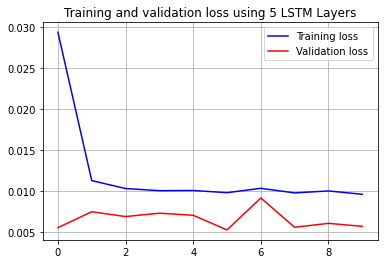

In [51]:
plot_history(history, 'Training and validation loss using 5 LSTM Layers')

In [52]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [53]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [54]:
print("rmse score for training dataset: ",sqrt(mean_squared_error(y_train,train_predict)))

rmse score for training dataset:  344.10726713578754


In [55]:
rmse=sqrt(mean_squared_error(y_test,test_predict))
print("Root Mean Squared Error for test dataset: ",rmse)

Root Mean Squared Error for test dataset:  421.92575457592295


In [56]:
fivelayerlstm={'Layer':5, 'RMSE Score': rmse, 'Type':"Uni-Directional"}
performance = performance.append(fivelayerlstm, ignore_index = True)

In [57]:
performance

,Layer,Type,RMSE Score
0,2.0,Uni-Directional,429.205832
1,3.0,Uni-Directional,432.214524
2,4.0,Uni-Directional,428.231048
3,5.0,Uni-Directional,421.925755


In [58]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_15 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_18 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_19 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                

In [60]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
14/14 [==============================] - 17s 338ms/step - loss: 0.0396 - val_loss: 0.0135
Epoch 2/10
14/14 [==============================] - 1s 63ms/step - loss: 0.0146 - val_loss: 0.0158
Epoch 3/10
14/14 [==============================] - 1s 63ms/step - loss: 0.0121 - val_loss: 0.0127
Epoch 4/10
14/14 [==============================] - 1s 77ms/step - loss: 0.0111 - val_loss: 0.0065
Epoch 5/10
14/14 [==============================] - 1s 71ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 6/10
14/14 [==============================] - 1s 64ms/step - loss: 0.0107 - val_loss: 0.0055
Epoch 7/10
14/14 [==============================] - 1s 74ms/step - loss: 0.0106 - val_loss: 0.0063
Epoch 8/10
14/14 [==============================] - 1s 59ms/step - loss: 0.0102 - val_loss: 0.0055
Epoch 9/10
14/14 [==============================] - 1s 67ms/step - loss: 0.0102 - val_loss: 0.0057
Epoch 10/10
14/14 [==============================] - 1s 75ms/step - loss: 0.0100 - val_loss: 0.0061


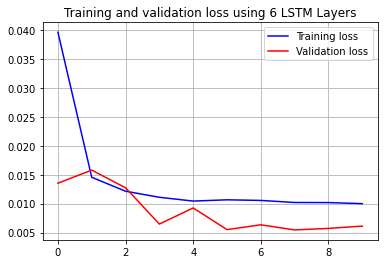

In [61]:
plot_history(history, 'Training and validation loss using 6 LSTM Layers')

In [62]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [63]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [64]:
print("rmse score for training dataset: ",sqrt(mean_squared_error(y_train,train_predict)))

rmse score for training dataset:  336.8960773558449


In [65]:
rmse=sqrt(mean_squared_error(y_test,test_predict))
print("Root Mean Squared Error for test dataset: ",rmse)

Root Mean Squared Error for test dataset:  415.1582566522099


In [66]:
sixlayerlstm={'Layer':6, 'RMSE Score': rmse, 'Type':"Uni-Directional"}
performance = performance.append(sixlayerlstm, ignore_index = True)

In [67]:
performance

,Layer,Type,RMSE Score
0,2.0,Uni-Directional,429.205832
1,3.0,Uni-Directional,432.214524
2,4.0,Uni-Directional,428.231048
3,5.0,Uni-Directional,421.925755
4,6.0,Uni-Directional,415.158257


In [68]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 100, 100)         40400     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 100, 100)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 100)         60400     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 100, 100)         

In [70]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
14/14 [==============================] - 29s 479ms/step - loss: 0.0363 - val_loss: 0.0106
Epoch 2/10
14/14 [==============================] - 1s 72ms/step - loss: 0.0121 - val_loss: 0.0100
Epoch 3/10
14/14 [==============================] - 1s 73ms/step - loss: 0.0104 - val_loss: 0.0072
Epoch 4/10
14/14 [==============================] - 1s 80ms/step - loss: 0.0095 - val_loss: 0.0056
Epoch 5/10
14/14 [==============================] - 1s 79ms/step - loss: 0.0090 - val_loss: 0.0054
Epoch 6/10
14/14 [==============================] - 1s 79ms/step - loss: 0.0094 - val_loss: 0.0058
Epoch 7/10
14/14 [==============================] - 1s 76ms/step - loss: 0.0085 - val_loss: 0.0068
Epoch 8/10
14/14 [==============================] - 1s 77ms/step - loss: 0.0085 - val_loss: 0.0057
Epoch 9/10
14/14 [==============================] - 1s 83ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 10/10
14/14 [==============================] - 1s 79ms/step - loss: 0.0085 - val_loss: 0.0063


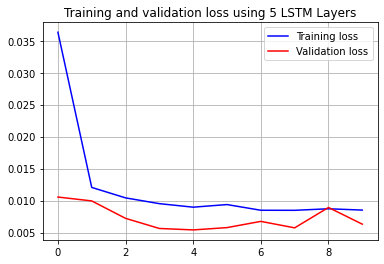

In [71]:
plot_history(history, 'Training and validation loss using 5 LSTM Layers')

In [72]:
train_predict=model.predict(X_train)

In [73]:
print("rmse score for training dataset: ",sqrt(mean_squared_error(y_train,train_predict)))

rmse score for training dataset:  0.08620972252600011


In [74]:
test_predict=model.predict(X_test)

In [75]:
rmse=sqrt(mean_squared_error(y_test,test_predict))
print("Root Mean Squared Error for test dataset: ",rmse)

Root Mean Squared Error for test dataset:  0.07948134053709056


In [76]:
#considering previous 100 values to predict the future value i.e the next value
x_input=test_data[141:].reshape(1,-1)
x_input.shape

(1, 100)

In [77]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [78]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<60):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.4758967]
101
1 day input [0.39752381 0.58749834 0.55319581 0.55351649 0.56219671 0.43332333
 0.49826782 0.47770773 0.4792331  0.51896578 0.47585303 0.47888485
 0.50648633 0.46021886 0.47482562 0.41774288 0.51053691 0.47905575
 0.45115266 0.4992173  0.37839336 0.51195669 0.90562046 0.59678029
 0.60987386 0.44934004 0.49893195 0.4954691  0.44867963 0.48756904
 0.39674152 0.48656761 0.53160168 0.51982428 0.54581499 0.38115869
 0.49351033 0.49750134 0.45435491 0.47225919 0.37467919 0.65647154
 0.4958573  0.46929821 0.55869126 0.48816371 0.60535854 0.60094221
 0.51807352 0.54702289 0.41101746 0.51001416 0.48931516 0.45919501
 0.5028642  0.40577756 0.54067639 0.50694646 0.50398162 0.48761698
 0.36675824 0.48366773 0.47927846 0.42270671 0.46112363 0.38295507
 0.51554714 0.61055668 0.53880809 0.54804674 0.43666405 0.51826916
 0.51700945 0.46007271 0.47419708 0.3820534  0.48709964 0.52795788
 0.45976571 0.48902517 0.42739447 0.5001963  0.52659841 0.44696677
 0.46790395 0.40539864 0.54093081 

In [79]:
day_new=np.arange(1,101)
day_pred=np.arange(101,161)

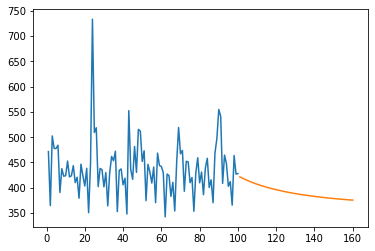

In [80]:
plt.plot(day_new,scaler.inverse_transform(sales[1102:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))